# Week 5 Exercise

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# file location
file_name = "labeledTrainData.tsv"
# importing reviews file
reviews = pd.read_csv(file_name, sep="\t")
reviews.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [3]:
def clean_reviews(reviews):
    """prepares series of text data for sentiment analysis by:
       converting to lowercase, removing punctuation & special characters, 
       removing stop words, and stemming words. Joins tokenized words together 
       at the end for use with Vectorizers"""
    # convert all text to lowercase
    lowercase = reviews.str.lower()
    # remove punctuation and special characters
    clean = [re.sub('[^A-Za-z0-9 ]+', '', review) for review in lowercase]
    # english stop words
    stop_words = stopwords.words("english")
    # tokenize review into words
    token_clean = [word_tokenize(review) for review in clean]
    # remove stop words
    cleaner = [[word for word in review if word not in stop_words ] for review in token_clean]
    # stem words
    porter = PorterStemmer()
    stemmed = [[porter.stem(word) for word in review] for review in cleaner]
    # join words back together
    cleaned = [" ".join(review) for review in stemmed]
    return cleaned

In [4]:
# create cleaned reviews for use with bag of words & tfidf
cleaned = clean_reviews(reviews.review)

In [5]:
# put processed reviews into data frame
reviews["reviews_processed"] = cleaned

In [6]:
# set features and target
features = reviews.reviews_processed
target = reviews.sentiment

In [7]:
# split data
feat_train, feat_test, target_train, target_test = train_test_split(
    features, target, test_size=.2, random_state=1)

In [8]:
# create tf-idf
tfidf = TfidfVectorizer()
# fit and transform train set
feature_matrix_train = tfidf.fit_transform(feat_train)
# transform but don't fit test set
feature_matrix_test = tfidf.transform(feat_test)

### Logistic Regression Model

In [9]:
# train logistic regression on the training data
logistic_regression = LogisticRegression(random_state=0)
model = logistic_regression.fit(feature_matrix_train, target_train)

In [10]:
# predict with test set
predictions = model.predict(feature_matrix_test)

In [11]:
# find accuracy of model
acc = accuracy_score(target_test, predictions)
acc

0.886

In [12]:
# make confusion matrix for test set predictions
conf_mat = confusion_matrix(target_test, predictions)
conf_mat

array([[2188,  315],
       [ 255, 2242]], dtype=int64)

In [13]:
# find f1, recall, and precision
f1 = f1_score(target_test, predictions)
recall = recall_score(target_test, predictions)
precision = precision_score(target_test, predictions)
print(f"F1 Score: {f1}\nRecall Score: {recall}\nPrecision Score: {precision}")

F1 Score: 0.887218045112782
Recall Score: 0.8978774529435323
Precision Score: 0.8768087602659367


In [14]:
# predicted probabilities
target_prob = model.predict_proba(feature_matrix_test)[:, 1]
# true/false pos rates
fp_rate, tp_rate, treshold = roc_curve(target_test, target_prob)

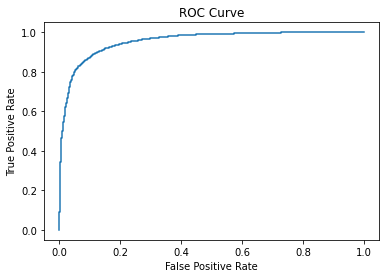

In [15]:
# plotting ROC curve
plt.title("ROC Curve")
plt.plot(fp_rate, tp_rate)
plt.ylabel("True Positive Rate"), plt.xlabel("False Positive Rate")
plt.show()

### Random Forest Classifier

In [17]:
# random forest classifier
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
model_forest = randomforest.fit(feature_matrix_train, target_train)

In [18]:
# make predictions
predictions_forest = model_forest.predict(feature_matrix_test)

In [19]:
# accuracy of forest
acc_forest = accuracy_score(target_test, predictions_forest)
acc_forest

0.8484

In [20]:
# confusion matrix forest
conf_mat_forest = confusion_matrix(target_test, predictions_forest)
conf_mat_forest

array([[2144,  359],
       [ 399, 2098]], dtype=int64)

In [23]:
# f1, precision, recall of RF
f1_forest = f1_score(target_test, predictions_forest)
recall_forest = recall_score(target_test, predictions_forest)
precision_forest = precision_score(target_test, predictions_forest)
print(f"F1 Score: {f1_forest}\nRecall Score: {recall_forest}\nPrecision Score: {precision_forest}")

F1 Score: 0.8469923294307631
Recall Score: 0.8402082498998799
Precision Score: 0.8538868538868539


In [21]:
# predicted probabilities
target_prob_forest = model_forest.predict_proba(feature_matrix_test)[:, 1]
# true/false pos rates
fp_rate_forest, tp_rate_forest, treshold_forest = roc_curve(target_test, target_prob_forest)

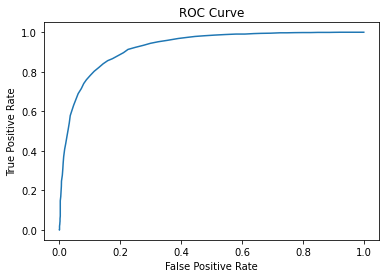

In [22]:
# plotting ROC curve
plt.title("ROC Curve")
plt.plot(fp_rate_forest, tp_rate_forest)
plt.ylabel("True Positive Rate"), plt.xlabel("False Positive Rate")
plt.show()